<a href="https://colab.research.google.com/github/gawriri/crop-yeild-prediction/blob/main/crop_yeild_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving maha data 2018 - 2019.csv to maha data 2018 - 2019 (2).csv
Saving maha data 2019 - 2020.csv to maha data 2019 - 2020 (2).csv
Saving maha data 2020 -2021.csv to maha data 2020 -2021 (2).csv
Saving maha data 2021-2022.csv to maha data 2021-2022 (2).csv
Saving maha data 2022 - 2023.csv to maha data 2022 - 2023 (2).csv
Saving maha data 2023-2024.csv to maha data 2023-2024 (2).csv
Saving maha data 2024 - 2025.csv to maha data 2024 - 2025 (2).csv
maha data 2018 - 2019 (2).csv → cleaned, shape = (23, 14)
maha data 2019 - 2020 (2).csv → cleaned, shape = (23, 14)
maha data 2020 -2021 (2).csv → cleaned, shape = (27, 14)
maha data 2021-2022 (2).csv → cleaned, shape = (28, 14)
maha data 2022 - 2023 (2).csv → cleaned, shape = (22, 14)
maha data 2023-2024 (2).csv → cleaned, shape = (22, 14)
⚠️ Skipping maha data 2024 - 2025 (2).csv due to error: "['Total_Area', 'Total_Production'] not in index"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

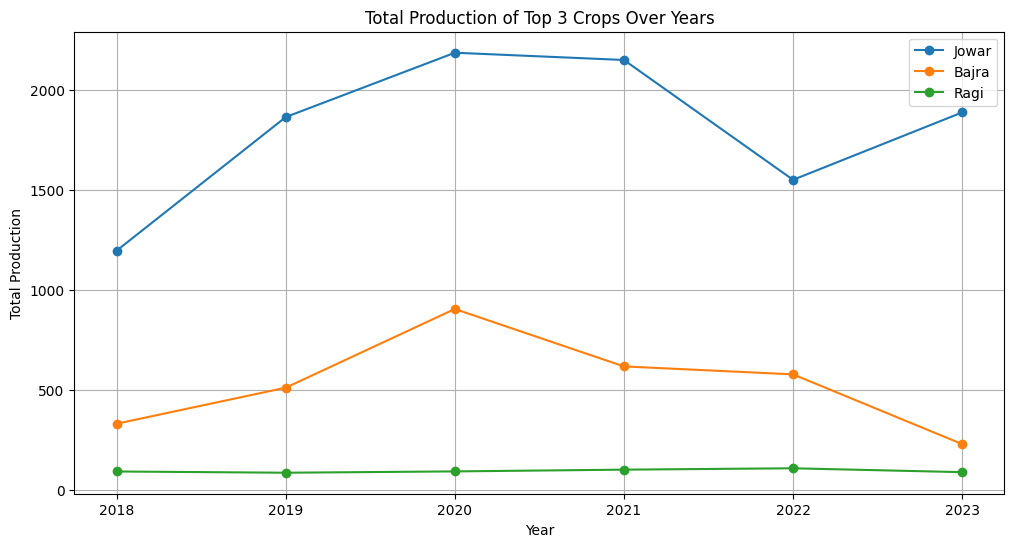

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated clean function
def clean_maha_file(filepath, year):
    df = pd.read_csv(filepath, skiprows=4, dtype=str)
    df.replace("#DIV/0!", pd.NA, inplace=True)
    df.dropna(how='all', inplace=True)
    df.columns = df.columns.str.strip()

    # Handle combined final column if needed
    last_col = df.columns[-1]
    if df[last_col].str.contains(r'\s+').any():
        try:
            split_cols = df[last_col].str.split(expand=True)
            split_cols.columns = ["Total_Area", "Total_Production", "Total_Productivity"]
            df = pd.concat([df.iloc[:, :-1], split_cols], axis=1)
        except Exception as e:
            print(f"Error splitting last column in file: {filepath}, error: {e}")
            raise
    else:
        if "Total_Area" not in df.columns:
            raise KeyError("Expected 'Total_Area' column not found and splitting not possible.")

    # Rename other columns safely
    rename_map = {
        df.columns[1]: "Crop",
        df.columns[2]: "Kharif_Area",
        df.columns[3]: "Kharif_Production",
        df.columns[4]: "Kharif_Productivity",
        df.columns[5]: "Rabi_Area",
        df.columns[6]: "Rabi_Production",
        df.columns[7]: "Rabi_Productivity",
        df.columns[8]: "Summer_Area",
        df.columns[9]: "Summer_Production",
        df.columns[10]: "Summer_Productivity",
    }
    df = df.rename(columns=rename_map)

    df["Year"] = int(year)

    keep_cols = ["Crop", "Kharif_Area", "Kharif_Production", "Kharif_Productivity",
                 "Rabi_Area", "Rabi_Production", "Rabi_Productivity",
                 "Summer_Area", "Summer_Production", "Summer_Productivity",
                 "Total_Area", "Total_Production", "Total_Productivity", "Year"]

    df = df[keep_cols]
    df = df[df["Crop"].notna()]
    df = df[~df["Crop"].str.contains("Total", case=False, na=False)]

    return df

# Combine all
cleaned_dfs = []

for filename in uploaded.keys():
    year = ''.join([c for c in filename if c.isdigit()][:4])
    try:
        cleaned_df = clean_maha_file(filename, year)
        print(f"{filename} → cleaned, shape = {cleaned_df.shape}")
        cleaned_dfs.append(cleaned_df)
    except Exception as e:
        print(f"⚠️ Skipping {filename} due to error: {e}")

# Combine
combined_df = pd.concat(cleaned_dfs, ignore_index=True)
numeric_cols = combined_df.columns.drop(["Crop", "Year"])
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Save
output_path = '/content/maharashtra_crop_yield_cleaned_2018_2024.csv'
combined_df.to_csv(output_path, index=False)
files.download(output_path)

# Plot
top_crops = combined_df["Crop"].value_counts().head(3).index
plt.figure(figsize=(12,6))
for crop in top_crops:
    subset = combined_df[combined_df["Crop"] == crop]
    plt.plot(subset["Year"], subset["Total_Production"], label=crop, marker='o')
plt.title("Total Production of Top 3 Crops Over Years")
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.legend()
plt.grid(True)
plt.show()



Rows, columns: (145, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Crop                 145 non-null    object 
 1   Kharif_Area          31 non-null     float64
 2   Kharif_Production    99 non-null     float64
 3   Kharif_Productivity  99 non-null     float64
 4   Rabi_Area            89 non-null     float64
 5   Rabi_Production      65 non-null     float64
 6   Rabi_Productivity    65 non-null     float64
 7   Summer_Area          62 non-null     float64
 8   Summer_Production    60 non-null     float64
 9   Summer_Productivity  60 non-null     float64
 10  Total_Area           118 non-null    float64
 11  Total_Production     118 non-null    float64
 12  Total_Productivity   118 non-null    float64
 13  Year                 145 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 16.0+ KB
None
 

<ipython-input-19-bb466f2c7c39>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=combined_df, x="Year", y="Total_Production", ci=None)


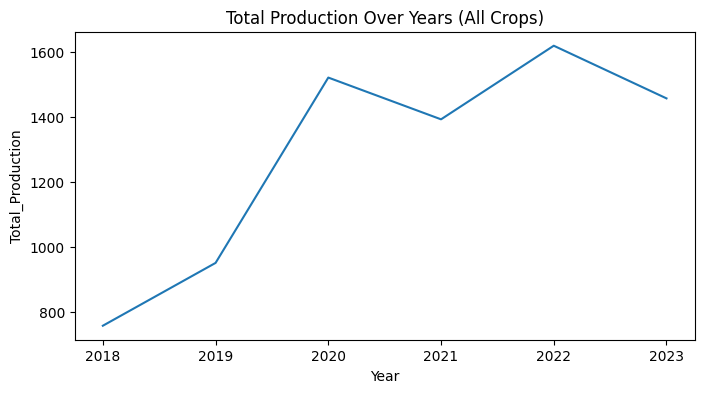

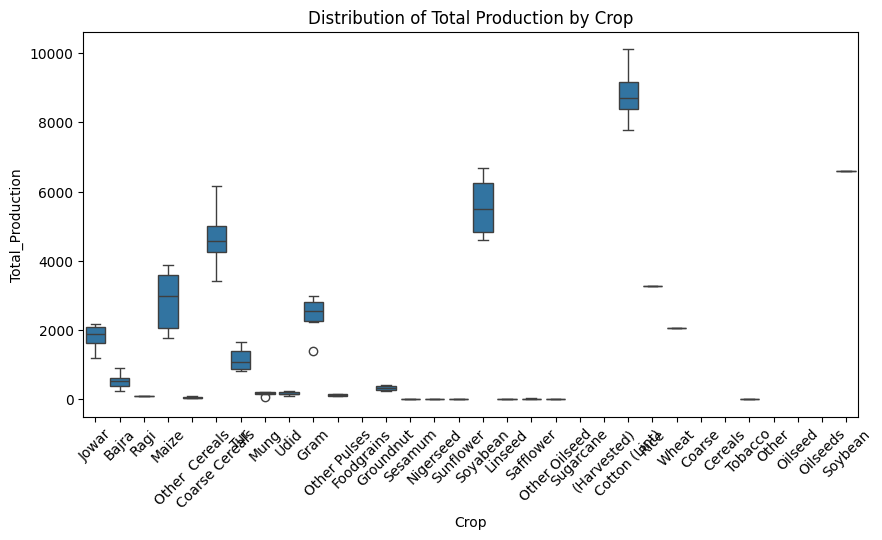

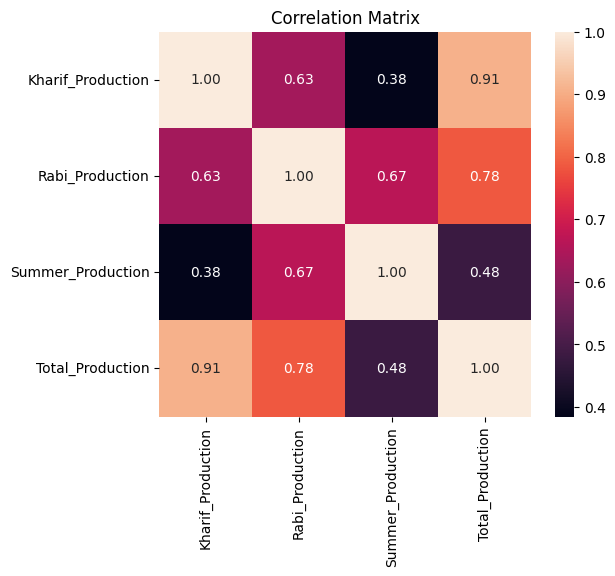

In [ ]:
# --- Section: Exploratory Data Analysis (EDA) ---

import seaborn as sns

# 1) Quick overview
print("Rows, columns:", combined_df.shape)
print(combined_df.info())
print(combined_df.describe())

# 2) Missing values
print("\nMissing values per column:")
print(combined_df.isna().sum())

# 3) Yearly distribution of total production
plt.figure(figsize=(8,4))
sns.lineplot(data=combined_df, x="Year", y="Total_Production", ci=None)
plt.title("Total Production Over Years (All Crops)")
plt.show()

# 4) Per-crop boxplots of productivity
plt.figure(figsize=(10,5))
sns.boxplot(data=combined_df, x="Crop", y="Total_Production")
plt.xticks(rotation=45)
plt.title("Distribution of Total Production by Crop")
plt.show()

# 5) Correlation heatmap among numeric features
num_cols = ["Kharif_Production","Rabi_Production","Summer_Production","Total_Production"]
plt.figure(figsize=(6,5))
sns.heatmap(combined_df[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 1) Aggregate to one value per Year–Crop
agg = (combined_df
       .query("Crop in ['Jowar','Bajra','Maize']")
       .groupby(['Year','Crop'])['Total_Production']
       .sum()
       .reset_index())

# 2) Pivot only those four crops
prod_pivot = (agg
              .pivot(index='Year', columns='Crop', values='Total_Production')
              .sort_index())

# 3) Build only the lag/roll features for those same four
lags = pd.concat({
    f"{crop}_lag{lag}": prod_pivot[crop].shift(lag)
    for lag in [1,2,3]
    for crop in prod_pivot.columns
}, axis=1)

rolls = pd.concat({
    f"{crop}_roll{win}": prod_pivot[crop].rolling(win).mean()
    for win in [2,3]
    for crop in prod_pivot.columns
}, axis=1)

# 4) Combine & clean
feature_df = pd.concat([prod_pivot, lags, rolls], axis=1)
feature_df['Year'] = feature_df.index
# Now dropna only on the newly created columns:
feature_df = feature_df.dropna(subset=lags.columns.tolist() + rolls.columns.tolist()) \
                       .reset_index(drop=True)

print(feature_df)


    Bajra    Jowar    Maize  Bajra_lag1  Jowar_lag1  Maize_lag1  Bajra_lag2  \
0  618.58  2149.97  3584.95      905.60     2186.30     3588.00      512.30   
1  578.90  1551.10  3888.20      618.58     2149.97     3584.95      905.60   
2  230.41  1887.90  2398.03      578.90     1551.10     3888.20      618.58   

   Jowar_lag2  Maize_lag2  Bajra_lag3  Jowar_lag3  Maize_lag3  Bajra_roll2  \
0     1864.70     1960.00       332.2      1197.3      1765.2      762.090   
1     2186.30     3588.00       512.3      1864.7      1960.0      598.740   
2     2149.97     3584.95       905.6      2186.3      3588.0      404.655   

   Jowar_roll2  Maize_roll2  Bajra_roll3  Jowar_roll3  Maize_roll3  Year  
0     2168.135     3586.475   678.826667  2066.990000  3044.316667  2021  
1     1850.535     3736.575   701.026667  1962.456667  3687.050000  2022  
2     1719.500     3143.115   475.963333  1862.990000  3290.393333  2023  


Selected Crops in Dataset:
['Jowar' 'Bajra' 'Ragi' 'Maize' 'Other  Cereals' 'Coarse Cereals' 'Tur'
 'Mung' 'Udid' 'Gram' 'Other Pulses' 'Foodgrains' 'Groundnut' 'Sesamum'
 'Nigerseed' 'Sunflower' 'Soyabean' 'Linseed' 'Safflower' 'Other Oilseed'
 'Sugarcane' '(Harvested)' 'Cotton (Lint)' 'Rice' 'Wheat' 'Coarse'
 'Cereals' 'Tobacco' 'Other' 'Oilseed' 'Oilseeds' 'Soybean']


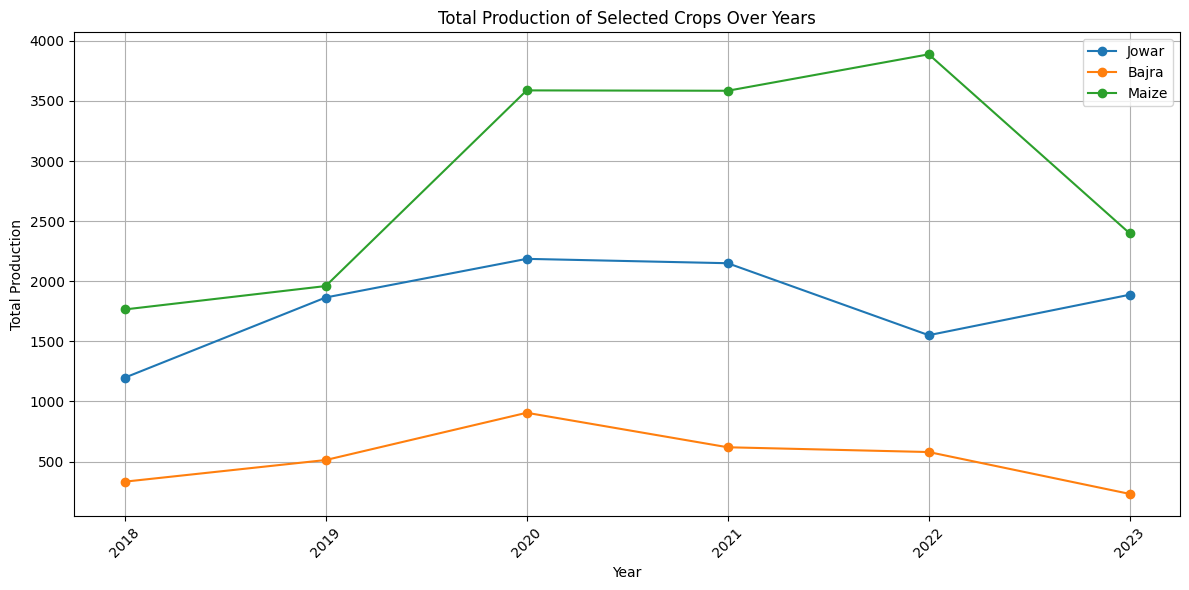

In [ ]:
import matplotlib.pyplot as plt

# Define the selected crops
selected_crops = ['Jowar', 'Bajra', 'Maize']

# Check if the selected crops are present in the dataset
print("Selected Crops in Dataset:")
print(combined_df['Crop'].unique())

# Filter data for the selected crops
plt.figure(figsize=(12, 6))
for crop in selected_crops:
    subset = combined_df[combined_df['Crop'] == crop]
    if subset.empty:
        print(f"No data found for {crop}")
    else:
        plt.plot(subset['Year'], subset['Total_Production'], label=crop, marker='o')

# Customize the plot
plt.title("Total Production of Selected Crops Over Years")
plt.ylabel("Total Production")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



In [ ]:
print(combined_df['Year'].unique())


[2018 2019 2020 2021 2022 2023]


In [ ]:
# Define the split year
train_year = 2022  # Train from 2018 to 2022

# Split the data
train_data = combined_df[combined_df['Year'] <= train_year]
test_data = combined_df[combined_df['Year'] == 2023]  # Test on 2023

# Display the shape of training and testing datasets
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

# Show samples
print("\nTraining Data Sample:\n", train_data.head())
print("\nTesting Data Sample:\n", test_data.head())


Training Data Shape: (123, 14)
Testing Data Shape: (22, 14)

Training Data Sample:
              Crop  Kharif_Area  Kharif_Production  Kharif_Productivity  \
0           Jowar          NaN              530.3                429.7   
1           Bajra          NaN              609.6                332.2   
2            Ragi          NaN               80.3                 93.5   
3           Maize          NaN              708.0               1365.0   
4  Other  Cereals          NaN               46.6                 21.6   

   Rabi_Area  Rabi_Production  Rabi_Productivity  Summer_Area  \
0      810.2           1909.2              767.6        402.1   
1      545.0              NaN                NaN          NaN   
2     1164.1              NaN                NaN          NaN   
3     1928.0            201.4              379.7       1885.4   
4      463.3             13.0                4.4        338.5   

   Summer_Production  Summer_Productivity  Total_Area  Total_Production  \
0    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your cleaned data
df = pd.read_csv('/content/maharashtra_crop_yield_cleaned_2018_2024.csv')

crop_names = ['Jowar', 'Bajra','Maize']
last_train_year = 2023
forecast_years = list(range(last_train_year+1, 2031))  # [2024, 2025, ..., 2030]

# Prepare a DataFrame to hold forecasts
forecast_df = pd.DataFrame(index=forecast_years, columns=crop_names)



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load cleaned data
df = pd.read_csv('/content/maharashtra_crop_yield_cleaned_2018_2024.csv')

# Crops to forecast
crop_names = ['Jowar', 'Bajra', 'Maize']
forecast_years = 6  # 2025–2030

# Empty list to collect all predictions
forecast_records = []

for crop in crop_names:
    crop_df = df[df['Crop'].str.lower() == crop.lower()]
    yearly = crop_df.groupby('Year')['Total_Production'].sum().reset_index()
    yearly['Year'] = yearly['Year'].astype(int)
    yearly = yearly.sort_values('Year')

    # Set time series index
    series = yearly.set_index(pd.PeriodIndex(yearly['Year'], freq='Y'))['Total_Production']

    try:
        model = SARIMAX(series, order=(1,1,1), seasonal_order=(0,0,0,0),
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.get_forecast(steps=forecast_years)
        predicted = forecast.predicted_mean

        # Add predictions to list
        for i in range(forecast_years):
            forecast_year = 2025 + i
            forecast_records.append({
                'Year': forecast_year,
                'Crop': crop,
                'Predicted_Yield': round(predicted.iloc[i], 2)
            })

    except Exception as e:
        print(f" Error forecasting for {crop}: {e}")

# Convert all forecasts to DataFrame
forecast_df = pd.DataFrame(forecast_records)

# Pivot the DataFrame
forecast_df = forecast_df.pivot(index='Year', columns='Crop', values='Predicted_Yield')

# Save to CSV
forecast_df.to_csv("predicted_crop_yield_2025_2030", index=False)
print(forecast_df)



Crop   Bajra    Jowar    Maize
Year                          
2025  357.91  1757.43  2176.56
2026  304.44  1806.56  2154.02
2027  326.86  1788.06  2151.72
2028  317.46  1795.03  2151.49
2029  321.40  1792.40  2151.46
2030  319.75  1793.39  2151.46


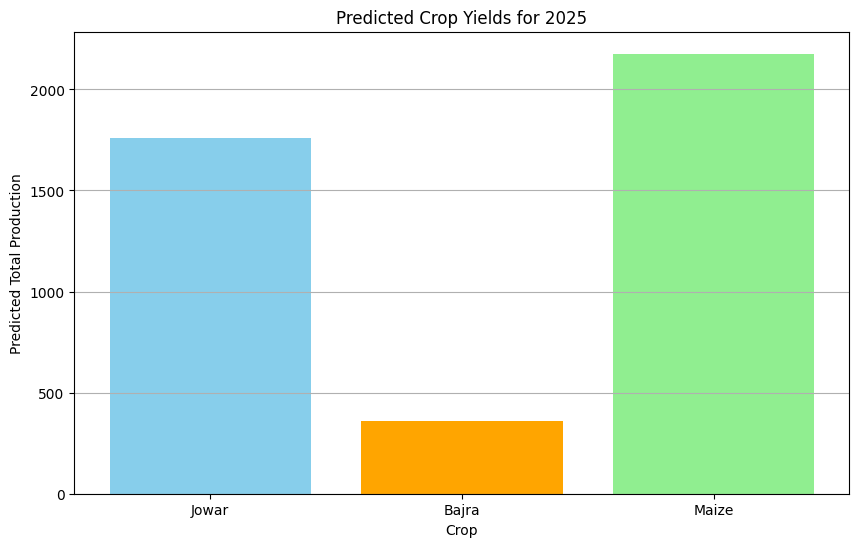

In [ ]:
import matplotlib.pyplot as plt

# Predictions for 2025
predictions = {
    'Jowar': 1757.4266499915727,
    'Bajra': 357.91082328103346,
    'Maize': 2176.5563784320875
}

crops = list(predictions.keys())
values = list(predictions.values())

plt.figure(figsize=(10, 6))
plt.bar(crops, values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Predicted Crop Yields for 2025')
plt.xlabel('Crop')
plt.ylabel('Predicted Total Production')
plt.grid(True, axis='y')
plt.show()




In [ ]:
# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_records)

# Save to CSV
forecast_df.to_csv('forecast_crops_2025_2030.csv', index=False)

# Save to JSON
forecast_df.to_json('forecast_crops_2025_2030.json', orient='records')

# Download to your local machine
from google.colab import files
files.download('forecast_crops_2025_2030.csv')
files.download('forecast_crops_2025_2030.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit ngrok --quiet
!pip install pyngrok --quiet


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import altair as alt

# Load CSV data
df = pd.read_csv("/content/forecast_crops_2025_2030.csv")

# Convert Predicted_Yield to numeric just in case
df["Predicted_Yield"] = pd.to_numeric(df["Predicted_Yield"], errors="coerce")

st.set_page_config(page_title="Crop Forecast", layout="centered")
st.title("🌾 Crop Forecast: 2025–2030")

# Crop selector dropdown
selected_crop = st.selectbox("Choose a Crop", df["Crop"].unique())

# Filter data for selected crop
filtered = df[df["Crop"] == selected_crop]

# Create an Altair bar chart instead of a line chart
chart = alt.Chart(filtered).mark_bar().encode(
    x=alt.X("Year:O", title="Year"),              # Ordinal x-axis
    y=alt.Y("Predicted_Yield:Q", title="Predicted Yield"),
    tooltip=["Year", "Predicted_Yield"]
).properties(
    width=700,
    height=400,
    title=f"Predicted Yield for {selected_crop}"
)

# Display the chart and the filtered dataframe
st.altair_chart(chart, use_container_width=True)
st.dataframe(filtered)





Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2xSWesJh5X4JTHJRIdEtNLIK4HJ_2Kkn3QShSnWdJU54iKg7X


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

# Run Streamlit in background
def run():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run)
thread.start()

# Wait for the app to start
time.sleep(5)

# Create public URL
public_url = ngrok.connect(8501, "http")

print(f"🌐 Public URL: {public_url}")




🌐 Public URL: NgrokTunnel: "https://1419-34-91-55-199.ngrok-free.app" -> "http://localhost:8501"


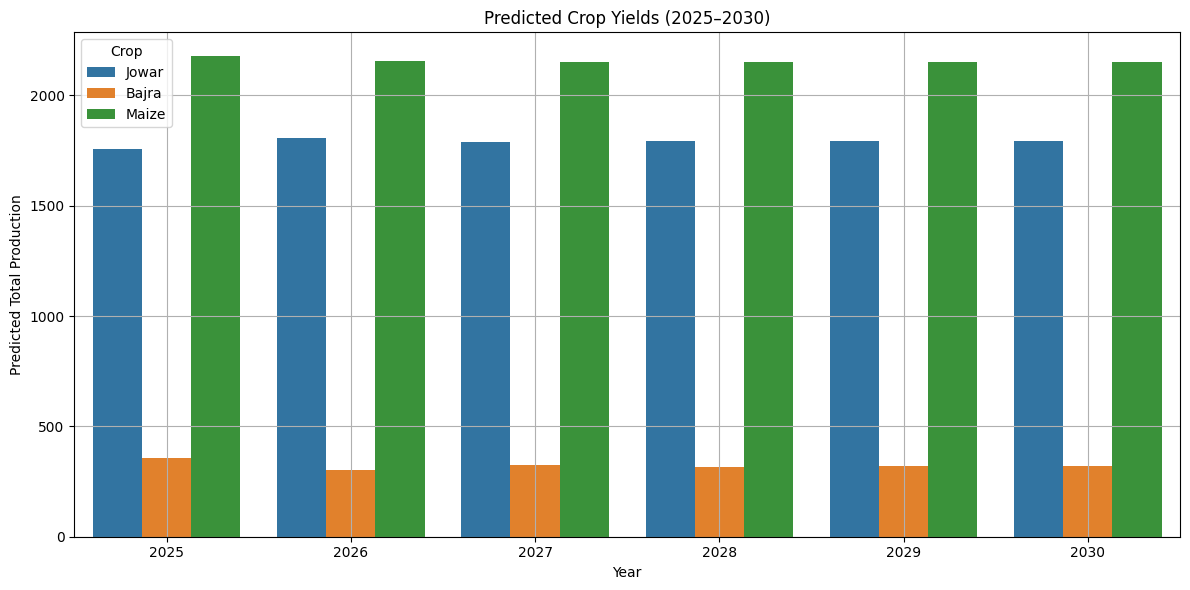

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot with Year on x-axis, Predicted_Yield on y-axis, and color by Crop
sns.barplot(data=forecast_df, x='Year', y='Predicted_Yield', hue='Crop')

# Customize plot appearance
plt.title('Predicted Crop Yields (2025–2030)')
plt.xlabel('Year')
plt.ylabel('Predicted Total Production')
plt.xticks(rotation=0)  # Optional: rotate if overlapping
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
